In [58]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Load flowers dataset

In [7]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 51s 0us/step


In [8]:
data_dir

'.\\datasets\\flower_photos'

In [9]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [10]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [11]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [12]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

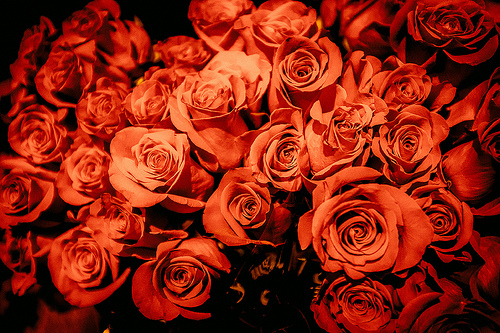

In [17]:
PIL.Image.open(str(roses[2]))

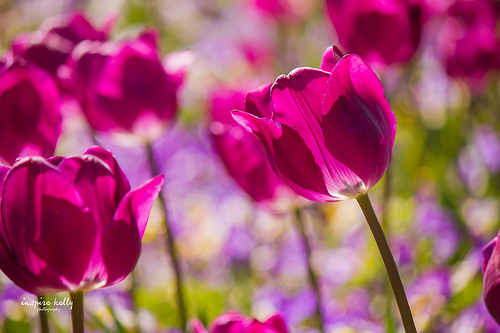

In [16]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[6]))

### Read flowers images from disk into numpy array using opencv 

In [19]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [31]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [32]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [33]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [34]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [35]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [36]:
img.shape

(240, 179, 3)

In [37]:
cv2.resize(img,(180,180)).shape


(180, 180, 3)

In [40]:
for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [38]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [41]:
X = np.array(X)
y = np.array(y)

### Train test split

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Preprocessing: scale images 

In [43]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Build convolutional neural network and train it 

In [44]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 59s 525ms/step - accuracy: 0.3383 - loss: 1.5334
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 423ms/step - accuracy: 0.6025 - loss: 1.0113
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 359ms/step - accuracy: 0.6997 - loss: 0.7936
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 355ms/step - accuracy: 0.7993 - loss: 0.5825
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 369ms/step - accuracy: 0.8557 - loss: 0.4088
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 361ms/step - accuracy: 0.9255 - loss: 0.2365
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 360ms/step - accuracy: 0.9496 - loss: 0.1566
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 361ms/step - accuracy: 0.9593 - loss: 0.1176
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 361ms/step - accuracy: 0.9793 - loss: 0.0658
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 362ms/step - accuracy: 0.9854 - loss: 0.0627
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 371ms/step - accuracy: 0.9844 - loss: 0.0582
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 31

In [45]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.6408 - loss: 3.0457


[3.030048131942749, 0.6405228972434998]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (64.08%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [46]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step


array([[ 20.994862 ,  39.24125  ,  14.00144  , -17.379118 ,  -4.428012 ],
       [ 16.707724 ,   9.407624 ,  -5.618686 ,  -4.828913 ,  10.910842 ],
       [ -3.2510498,   8.432222 ,  20.71193  ,  -6.7471204,  -4.4878902],
       ...,
       [  6.5553474,  -5.413943 ,  -1.3420924,  11.138293 ,  16.742615 ],
       [  5.486381 ,  12.961209 ,   7.7293253,   3.3739266,   0.8186622],
       [  2.6921785, -10.614491 ,   3.4038894,  10.909794 ,   6.415147 ]],
      dtype=float32)

In [47]:
score = tf.nn.softmax(predictions[0])

In [48]:
np.argmax(score)

1

In [49]:
y_test[0]

1

### Improve Test Accuracy Using Data Augmentation 

In [55]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [64]:
img_height = 224 
img_width = 224
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

### Original Image 

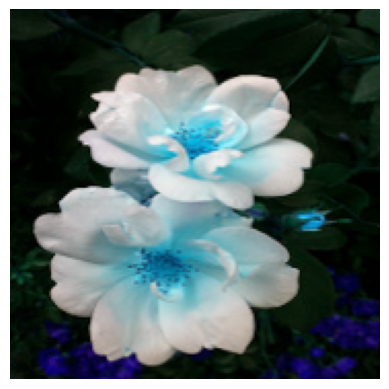

In [65]:
plt.axis('off')
plt.imshow(X[0])

Newly generated training sample using data augmentation

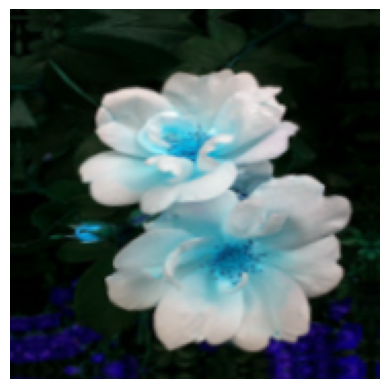

In [66]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

### Train the model using data augmentation and a drop out layer 

In [70]:


from tensorflow.keras import layers, Sequential
import tensorflow as tf

num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling2D(),  # Use GlobalAveragePooling instead of Flatten
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(X_train_scaled, y_train, epochs=30)



Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 73s 482ms/step - accuracy: 0.2898 - loss: 1.5515
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 470ms/step - accuracy: 0.4471 - loss: 1.2518
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 455ms/step - accuracy: 0.5172 - loss: 1.1717
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 452ms/step - accuracy: 0.5371 - loss: 1.1082
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 461ms/step - accuracy: 0.5489 - loss: 1.1184
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 457ms/step - accuracy: 0.5770 - loss: 1.0456
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 462ms/step - accuracy: 0.5979 - loss: 1.0066
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 461ms/step - accuracy: 0.6105 - loss: 0.9561
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 465ms/step - accuracy: 0.6033 - loss: 0.9696
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 462ms/step - accuracy: 0.6419 - loss: 0.9264
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 463ms/step - accuracy: 0.6499 - loss: 0.8934
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41

In [71]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6658 - loss: 0.8619


[0.8911222815513611, 0.6677560210227966]